In [13]:
import pandas as pd
# reset colwitdth options when running all cells 
pd.reset_option('display.max_colwidth')
from textblob import TextBlob
import math


In [14]:
#!pip install -U textblob
#!python -m textblob.download_corpora

In [15]:
data = pd.read_json('processed_data/data_merged.json')
# remove columns that were unexpectedly generated during saving
# data.drop(columns=['level_0', 'index'], inplace=True)
data.tail(3)

,timestamp,hashtags,text,username,likes,replies,retweets,Open,Close,PriceUp
4946,2018-06-04,"[Tesla, Model3pic]",Report: Tesla Has Refunded 23% of Model 3 Depo...,Tesla Motors Club,91,13,13,294.34,296.74,True
4947,2018-06-04,"[Tesla, NikolaTeslapic]",Make electricity free again! #Tesla #NikolaTes...,Mr A 🎶🎵 ♏,2,1,1,294.34,296.74,True
4948,2018-06-04,"[Tesla, ElonMusk, CFD, forex, equitypic]",#Tesla #ElonMusk #CFD #forex #equitypic.twitte...,The Utkarsh,2,1,1,294.34,296.74,True


In [16]:
# group data by day
daily_data = data.groupby(data['timestamp'], as_index=False)
daily_data.first()

,timestamp,hashtags,text,username,likes,replies,retweets,Open,Close,PriceUp
0,2018-01-02,"[Tesla, ModelS]","In the past 2 years, I've driven 18,823 miles ...",Ben Sullins 💪,110,6,10,312.00,320.53,True
1,2018-01-03,[Tesla],Día de piernas ... Estrenando mallas...#Tesla ...,El CaZador,107,3,4,321.00,317.25,False
2,2018-01-04,"[Innovation, Tesla, electricvehicles, Cars, br...",This is awesome! New brand technology #Innovat...,Gabriela Mascaró,6,1,3,312.87,314.62,True
3,2018-01-05,"[Tesla, TeslaModel3]",#Tesla #TeslaModel3 hahapic.twitter.com/DMlxOf...,WtaFiGO,19,1,7,316.62,316.58,False
4,2018-01-08,[Tesla],Tesla Planning Supercharger Station With ‘Old ...,Tesla Motors Club,132,4,16,316.00,336.41,True
...,...,...,...,...,...,...,...,...,...,...
98,2018-05-29,"[Tesla, Elektroautopic]","#Tesla Model 3: Europa-Start ""erste Jahreshälf...",ecomento.de,3,2,1,278.51,283.76,True
99,2018-05-30,[Tesla],Oh well... in case you were wondering why @Tes...,Safer Vehicles Proved,27,4,9,283.29,291.72,True
100,2018-05-31,[Tesla],Take comfort #Tesla friends. All the alleged ...,Groggy T. Bear,22,4,3,287.21,284.73,False
101,2018-06-01,"[FBI, Tesla]",Según documento desclasificado del #FBI Niko...,Misterio Desconocido,40,3,14,285.86,291.82,True


In [17]:
# count tweets per day to see if they're ok'ish distributed
tweets_per_day = daily_data['text'].count()
tweets_per_day.describe()

,text
count,103.000000
mean,48.048544
std,34.304970
min,6.000000
25%,34.500000
50%,40.000000
75%,51.000000
max,266.000000


In [18]:
# get groups' names
daily_data.groups.keys()
groups = [name for name, _ in daily_data]
groups[0]

Timestamp('2018-01-02 00:00:00')

In [19]:
# get all tweets from the first day
first_day_data = daily_data.get_group(groups[0])
first_day_data.head()

,timestamp,hashtags,text,username,likes,replies,retweets,Open,Close,PriceUp
0,2018-01-02,"[Tesla, ModelS]","In the past 2 years, I've driven 18,823 miles ...",Ben Sullins 💪,110,6,10,312.0,320.53,True
1,2018-01-02,"[Tesla, P90D, Blog, Youtube]",Ya estamos en @louesfera probando un #Tesla #P...,Fco Javier,2,1,2,312.0,320.53,True
2,2018-01-02,"[Snapchat, Uber, Twitter, Facebook, Tesla, Goo...",Here's how old these companies will be turning...,Imran,53,7,41,312.0,320.53,True
3,2018-01-02,[Muskwatchpic],"From SpaceX to Tesla, here are our biggest que...",Nerdist,37,5,10,312.0,320.53,True
4,2018-01-02,"[Braunschweig, VW, Tesla]",In #Braunschweig produziert #VW seine Batterie...,HAZ,5,3,2,312.0,320.53,True


Now we have the tweets accessible per day. The next step is to try different ways to use the polarity of a day to classify a day as to whether we should buy tweets the next day or now

In [20]:
buying_list = []
# vectorize train and test data with word vectors from spacy
for day in groups:
    # all tweets and priceUp's for a single day
    data_single_day = daily_data.get_group(day)
    # take only the relevant columns for the classifier
    data_single_day = data_single_day[['text', 'PriceUp']]
    rows, cols = data_single_day.shape
    # individual tweets per day
    polarity_day = 0
        ###################################
        # here is where the magic happens #
        ###################################
    for row in range(rows):
        tweet, price_up = data_single_day.iloc[row][['text','PriceUp']]
        # get sentiment here
        # get the mean or other type of the sentiment for a day here
        
        polarity_tweet =0
        blob = TextBlob(tweet)
        for sentence in blob.sentences:
            sentence_polarity = sentence.sentiment.polarity
            #if(sentence_polarity <0): # this is to have a bigger weighing towards negative sentences
            #    sentence_polarity *= 5
                
            polarity_tweet+= sentence_polarity
        
        polarity_tweet = polarity_tweet/len(blob.sentences)
        polarity_day = polarity_day + polarity_tweet
        
    polarity_day = polarity_day/rows # TODO: this is what could be changed -> CC: Jonas?
    
    buying_list.append([day,polarity_day])
        
       
        
    

In [21]:
#print(buying_list[:])

#min_date =  pd.to_datetime('2018-01-02 00:00:00')
#final_date = buying_list[-1][0]
#dates = pd.date_range(start=min_date, end=final_date)
df = pd.DataFrame(buying_list, columns=['day','sentiment'])
df2 = df.set_index('day').resample('D').asfreq()

Next we take the output arrays with our sentiment per day and simulate a play through the stock market to see how much money we could make with this strategy. 

The first strategy is to use the average sentiment
Other strategies could be: weighing tweets more if they are negative, or weighting them by length, or sampling from the positive/negative tweets per day

# From here: Simulate on the stock market 
-> create an array with a value per day, pass the array to the simulation and run. Also visualize the output

In [26]:
from stock_market_simulation import Trader, load_stock_prices_from_json, load_stock_prices_from_yahoo_finance

stock_prices = load_stock_prices_from_json()
# Only select sentiment of days we have stock data for (Where the trade market is open)
sentiment_at_trading_days = df2.loc[stock_prices.index]['sentiment'].to_list()
# Define actions when we want to buy. Do so only if sentiment passes a certain threshold
buy_or_sell = [-1 if sentiment < 0.015 else 1 if sentiment > 0.045 else 0 for sentiment in sentiment_at_trading_days]

In [27]:
# To view stock data:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(stock_prices)

,Open,Close,PriceUp
2018-01-02,312.00,320.53,True
2018-01-03,321.00,317.25,False
2018-01-04,312.87,314.62,True
2018-01-05,316.62,316.58,False
2018-01-08,316.00,336.41,True
2018-01-09,335.16,333.69,False
2018-01-10,332.20,334.80,True
2018-01-11,335.24,337.95,True
2018-01-12,338.63,336.22,False
2018-01-16,337.54,340.06,True


[1, -1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, -1, 0, 0, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, -1, 1, 1, 0, 1, 1, 1]
[1, -1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, -1, 0, 0, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, -1, 1, 1, 0, 1, 1, 1]
Day 0, Amount of Stock: 11, Capital: 9688.0, Net Worth= 13120.0
Day 1, Amount of Stock: 10, Capital: 10009.0, Net Worth= 13219.0
Day 2, Amount of Stock: 11, Capital: 9696.13, Net Worth= 13137.699999999999
Day 3, Amount of Stock: 11, Capital: 9696.13, Net Worth= 13178.949999999999
Day 4, Amount of Stock: 12, Capital: 9380.13, Net Worth= 13172.13
Day

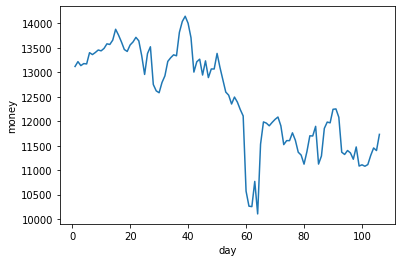

In [28]:
# Run the simulation
simulation = Trader(stock_prices, buy_or_sell)
simulation.stock_action()